# Análisis de componentes principales

En este notebook se busca implementar la metodología PCA con el fin de reducir la dimensión en nuestros
datos utilizando la aproximación (ver presentación)

$$
\mathbf{P}_{m \times k} \mathbf{W}_{k \times n}^{T} \approx \mathbf{X}_{m \times n}
$$

Aquí, la matriz $\mathbf{X}$ representará una imagen (en escala de grises).

Su programa deberá ir obteniendo el valor de $k$ correspondiente a los umbrales

```python
umbrales = np.arange(0.1, 0.99, 0.05)
```
y debe de ir graficando cada aproximación.

**Sugerencias**

```python
help(np.mean)
help(np.std)
help(np.cov) #utilice el parámetro rowvar = False
help(np.argsort)
help(np.linalg.eig)
help(np.real)
help(np.cumsum)
help(np.where)
```

In [1]:
from scipy import misc
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

"\n#Para leer una imagen local\n#se puede utilizar la función open del módulo\n#Image de la librería PIL\nimg_A = Image.open('homero.jpg')\nplt.imshow(img_A)\nplt.show()\n\n#Convertimos a blanco y negro\nimg_A = img_A.convert('L')\nplt.imshow(img_A,  cmap='gray')\nplt.show()\n\n#Convertimos a numpy array\nimg_A = np.array(img_A)\n"

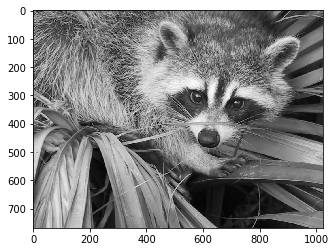

In [2]:
#Imagen prueba en escala de grises
img_A = misc.face(gray = True)
plt.imshow(img_A)
plt.imshow(img_A,  cmap='gray')
'''
#Para leer una imagen local
#se puede utilizar la función open del módulo
#Image de la librería PIL
img_A = Image.open('homero.jpg')
plt.imshow(img_A)
plt.show()

#Convertimos a blanco y negro
img_A = img_A.convert('L')
plt.imshow(img_A,  cmap='gray')
plt.show()

#Convertimos a numpy array
img_A = np.array(img_A)
'''

In [3]:
type(img_A)

numpy.ndarray

In [4]:
img_A.shape

(768, 1024)

In [5]:
#Normaliza los datos (media cero, desviación estándar 1)
medias = img_A.mean(axis = 0)
desv = img_A.std(axis = 0)
img_A_norm = (img_A - medias) / desv

In [6]:
#Obtiene la matriz de varianzas y covarianzas
sigma = np.cov(img_A_norm, rowvar = False)

In [7]:
#Obtiene los eigenvectores y eigenvalores
#de la matriz de varianzas y covarianzas
eig_val, eig_vec = np.linalg.eig(sigma)

In [8]:
#Ordena los eigenvalores de mayor a menor 
indices_orden = np.argsort(eig_val)
#el orden de argsort es de menor a mayor
#por eso se revierte
indices_orden = indices_orden[::-1]

eig_val = eig_val[indices_orden]

#Reacomoda los eigenvectores
eig_vec = eig_vec[:, indices_orden]

#quita parte imaginaria
eig_vec = np.real(eig_vec)
eig_val = np.real(eig_val)

In [9]:
#Crea la matriz de componentes principales
# P = X @ W
mat_pca = img_A_norm @ eig_vec

In [10]:
def determina_k(eig_val, umbral = 0.95):
    '''
    Función para determinar la aproximación
    del rango que acumula cierta "energía"
    
    ENTRADA
    eig_sig: ndarray con los eigen valores ordenados
    de mayor a menor
    
    umbral: float en (0,1)
    
    SALIDA
    entero positivo que determina cual es el rango k
    para aproximar la matriz A
    '''
    
    #proporciones acumuladas
    prop = np.cumsum(eig_val) / np.sum(eig_val)
    
    #localiza el primer índice que
    #rebasa el umbral
    k = np.where(prop >= umbral)[0][0]
    
    return k

In [11]:
def aproximacion(mat_pca, eig_vec, k):
    '''
    Función para obtener la aproximación de rango k
    de una matriz, utilizando SVD
    
    ENTRADA
    mat_pca: ndarray que representa la matriz de componentes principales
    
    eig_vec: ndarray con los eigen vectores ya ordenados de acuerdo
    a los eigenvalores
    
    k: Entero positivo que representa el orden de la aproximación
    (se obtiene con la función determina_k)
    
    SALIDA
    ndarray que representa la aproximación de la matriz original
    '''
    
    #k + 1 porque queremos que sea inclusive
    return mat_pca[:, 0:(k + 1)  ] @ (eig_vec.transpose())[0: (k + 1), :]
    

Para el umbral 0.1
El valor de k es 1
Imagen original necesita 786432 números
Aproximación necesita 1792 números



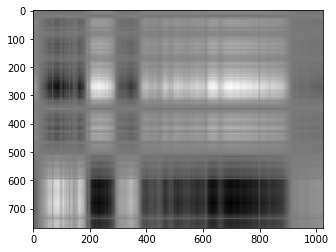

Para el umbral 0.15
El valor de k es 1
Imagen original necesita 786432 números
Aproximación necesita 1792 números



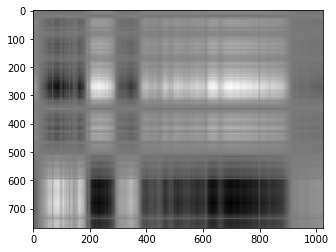

Para el umbral 0.2
El valor de k es 1
Imagen original necesita 786432 números
Aproximación necesita 1792 números



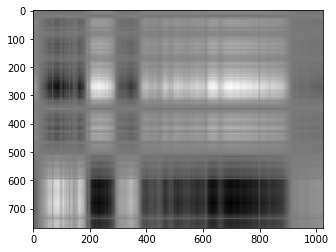

Para el umbral 0.25
El valor de k es 2
Imagen original necesita 786432 números
Aproximación necesita 3584 números



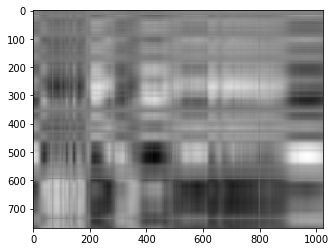

Para el umbral 0.3
El valor de k es 2
Imagen original necesita 786432 números
Aproximación necesita 3584 números



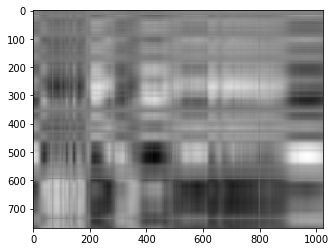

Para el umbral 0.35
El valor de k es 2
Imagen original necesita 786432 números
Aproximación necesita 3584 números



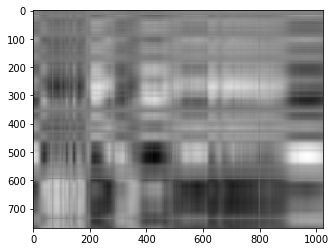

Para el umbral 0.4
El valor de k es 3
Imagen original necesita 786432 números
Aproximación necesita 5376 números



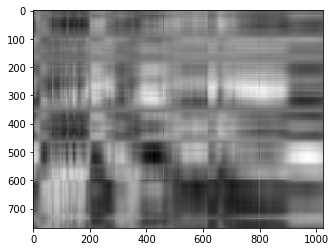

Para el umbral 0.45
El valor de k es 3
Imagen original necesita 786432 números
Aproximación necesita 5376 números



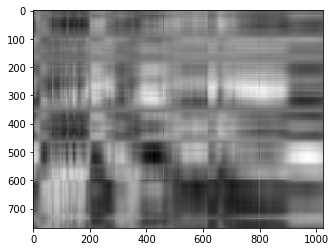

Para el umbral 0.5
El valor de k es 4
Imagen original necesita 786432 números
Aproximación necesita 7168 números



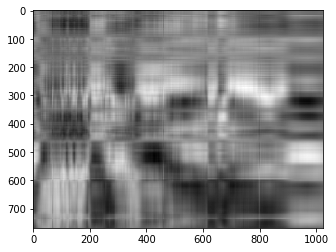

Para el umbral 0.55
El valor de k es 5
Imagen original necesita 786432 números
Aproximación necesita 8960 números



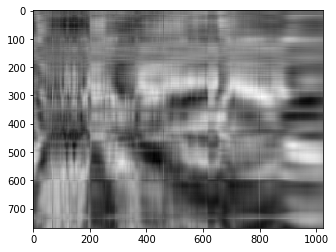

Para el umbral 0.6
El valor de k es 6
Imagen original necesita 786432 números
Aproximación necesita 10752 números



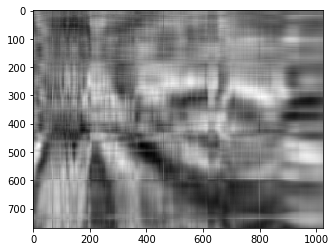

Para el umbral 0.65
El valor de k es 8
Imagen original necesita 786432 números
Aproximación necesita 14336 números



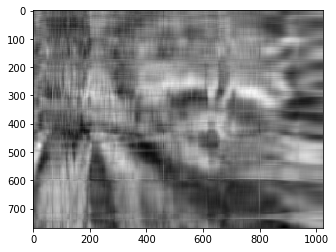

Para el umbral 0.7
El valor de k es 10
Imagen original necesita 786432 números
Aproximación necesita 17920 números



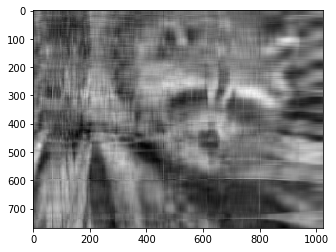

Para el umbral 0.75
El valor de k es 14
Imagen original necesita 786432 números
Aproximación necesita 25088 números



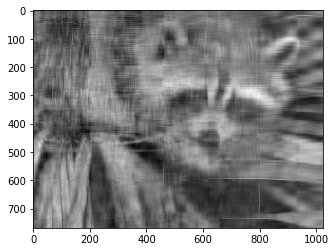

Para el umbral 0.8
El valor de k es 20
Imagen original necesita 786432 números
Aproximación necesita 35840 números



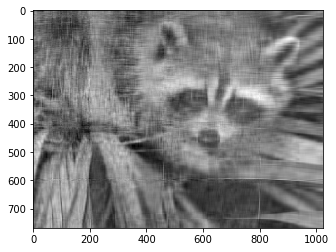

Para el umbral 0.85
El valor de k es 31
Imagen original necesita 786432 números
Aproximación necesita 55552 números



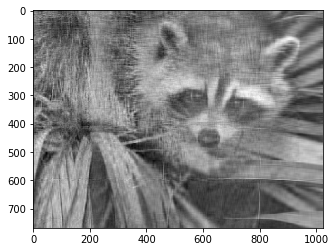

Para el umbral 0.9
El valor de k es 52
Imagen original necesita 786432 números
Aproximación necesita 93184 números



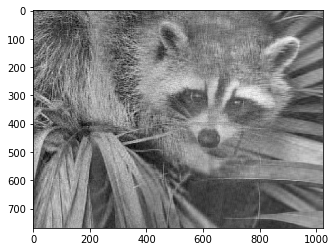

Para el umbral 0.95
El valor de k es 93
Imagen original necesita 786432 números
Aproximación necesita 166656 números



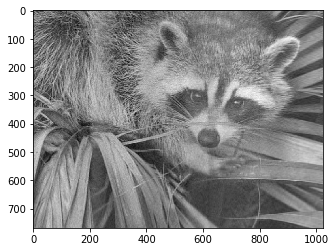

In [12]:
umbrales = np.arange(0.1, 0.99, 0.05)
m = img_A.shape[0]
n = img_A.shape[1]
num_orig = m * n
for u in umbrales:
    k = determina_k(eig_val, umbral = u)
    print('Para el umbral', round(u, 4))
    print('El valor de k es', k + 1)
    print('Imagen original necesita', m * n, 'números')
    print('Aproximación necesita', (k + 1)* (m + n), 'números')
    print()
    aprox = aproximacion(mat_pca, eig_vec, k)
    plt.imshow(aprox, cmap = 'gray')
    plt.show()